Stock Prediction :

Problem statement:
Take stock price of any company you
want  And predicts its price by using LSTM.
Use only Jupyter notebook code.


In [2]:
!pip install yfinance


     -------------------------------------- 65.3/65.3 kB 585.9 kB/s eta 0:00:00
     ---------------------------------------- 11.0/11.0 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf

# Replace 'AAPL' with the stock symbol of the company you're interested in.
ticker_symbol = "AAPL"

# Specify the start and end dates for the historical data.
start_date = "2020-01-01"
end_date = "2021-12-31"

# Fetch historical data from Yahoo Finance.
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file.
data.to_csv('historical_stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


In [5]:
!pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [11]:
#giving stocks for insepection
data = pd.read_csv(r'C:\Users\YASH MAHAJAN\Desktop\Data Science\historical_stock_data.csv')


# Assuming your CSV has a column 'Date' and 'Close' representing the date and closing price.
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [23]:
# Normalize the data to the range [0, 1] using Min-Max scaling.
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets.
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create sequences of data for training and testing.
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length:i+sequence_length+1]
        sequences.append((sequence, target))
    return sequences


sequence_length = 10  # You can adjust this value based on your data and requirements.
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

X_train, y_train = zip(*train_sequences)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = zip(*test_sequences)
X_test, y_test = np.array(X_test), np.array(y_test)


# Reshape the input sequences to have a shape of (None, sequence_length, 1).
X_train = X_train.reshape(-1, sequence_length, 1)
X_test = X_test.reshape(-1, sequence_length, 1)



In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')




18/18 [==============================] - 0s 3ms/step


ValueError: x and y must have same first dimension, but have shapes (91,) and (546, 1)

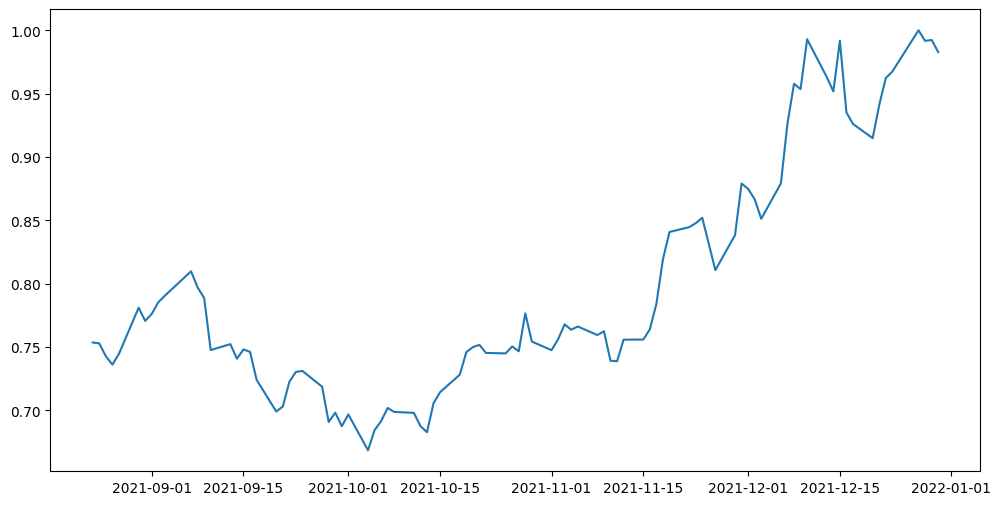

In [27]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale

# Ensure that data.index[train_size+sequence_length:] and test_data['Close'] have the same length.
# You can do this by selecting the same date range for both.
start_date = data.index[train_size + sequence_length].date()
end_date = data.index[-1].date()
test_data = test_data[start_date:end_date]

# Now, plot the data.
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Price')
plt.plot(test_data.index, predictions, label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

